In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context="notebook", style="whitegrid")
pd.set_option("display.max_columns", 100)

# Path to your CSV
CSV_PATH = "C:\\Users\\akula\\Downloads\\Raji\\Titanic.csv" # change if needed


# 1) Load data & quick structure

In [2]:
df = pd.read_csv(CSV_PATH, encoding="utf-8", low_memory=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Cell 2: Structure overview
print("Shape:", df.shape)
display(df.info())
display(df.describe(include="all").T)  # stats for numeric + categorical


Shape: (418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Survived,418.0,NaN,NaN,NaN,0.363636,0.481622,0.0,0.0,0.0,1.0,1.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Peter, Master. Michael J",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292


In [4]:
# Cell 3: Missing values overview
display(df.isnull().sum().sort_values(ascending=False))

Cabin          327
Age             86
Fare             1
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64

In [5]:
# Cell 4: Column type helpers
numeric_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(exclude="number").columns.tolist()
print("Numeric:", numeric_cols)
print("Categorical:", cat_cols)

Numeric: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


# 2) Categorical frequency (value\_counts)

In [6]:
# Cell 5: value_counts for top categorical columns
for col in cat_cols[:10]:  # limit to first 10 for readability
    print(f"\n=== {col} (top 10) ===")
    display(df[col].value_counts(dropna=False).head(10))


=== Name (top 10) ===


Name
Peter, Master. Michael J               1
Kelly, Mr. James                       1
Hipkins, Mr. William Edward            1
Asplund, Master. Carl Edgar            1
O'Connor, Mr. Patrick                  1
Foley, Mr. Joseph                      1
Risien, Mrs. Samuel (Emma)             1
McNamee, Mrs. Neal (Eileen O'Leary)    1
Wheeler, Mr. Edwin Frederick""         1
Herman, Miss. Kate                     1
Name: count, dtype: int64


=== Sex (top 10) ===


Sex
male      266
female    152
Name: count, dtype: int64


=== Ticket (top 10) ===


Ticket
PC 17608              5
CA. 2343              4
113503                4
PC 17483              3
347077                3
SOTON/O.Q. 3101315    3
16966                 3
220845                3
C.A. 31029            3
2660                  2
Name: count, dtype: int64


=== Cabin (top 10) ===


Cabin
NaN                327
B57 B59 B63 B66      3
B45                  2
C23 C25 C27          2
C78                  2
C31                  2
F4                   2
C80                  2
E34                  2
C116                 2
Name: count, dtype: int64


=== Embarked (top 10) ===


Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

# 3) Visualize Missing Data

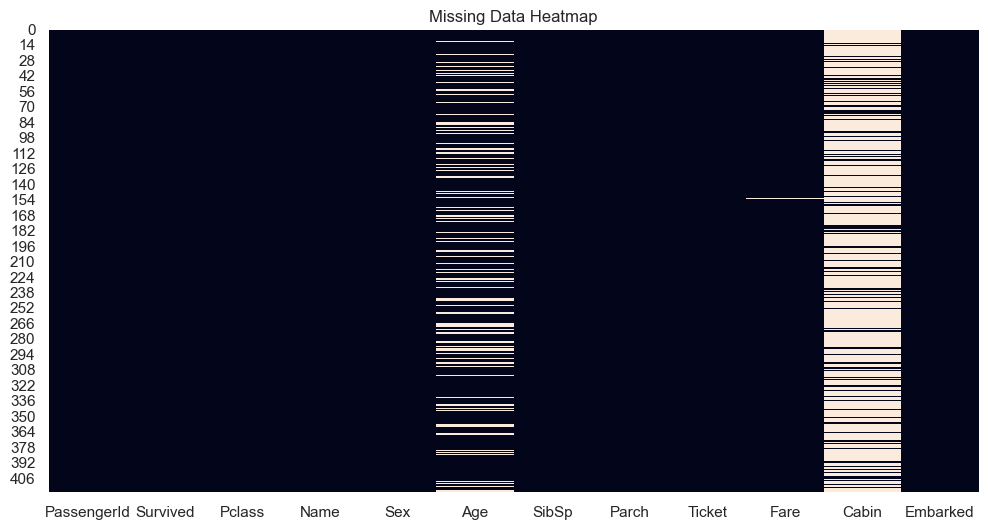

In [7]:
# Cell 6: Missingness heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# 4) Distributions & category analysis

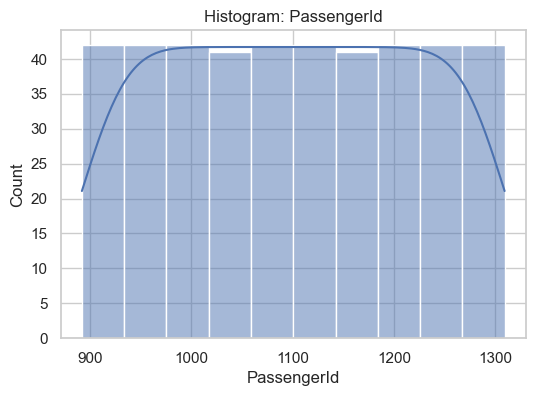

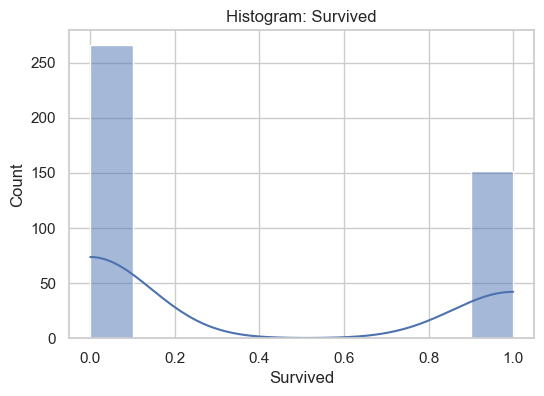

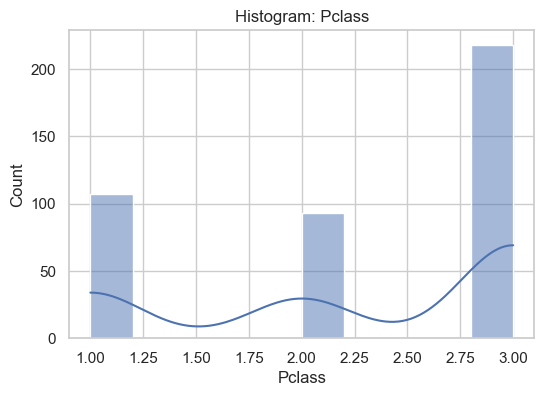

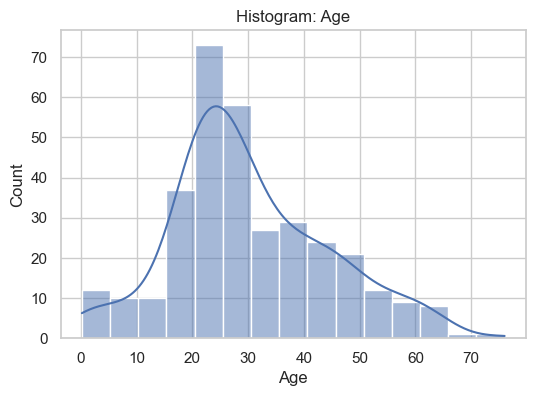

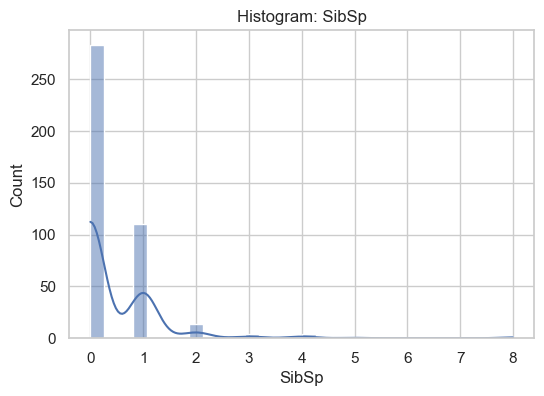

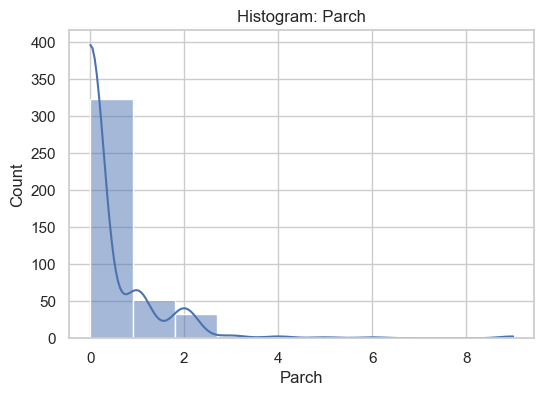

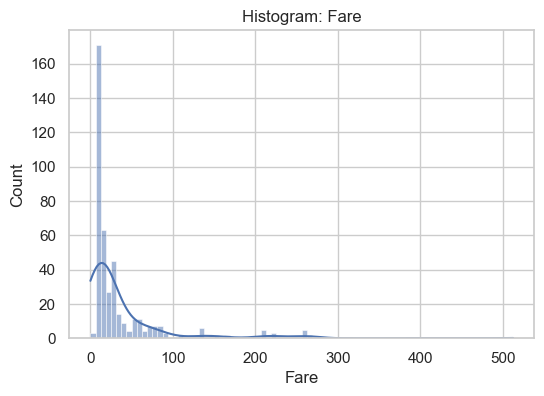

In [8]:
# Cell 7: Histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Histogram: {col}")
    plt.show()


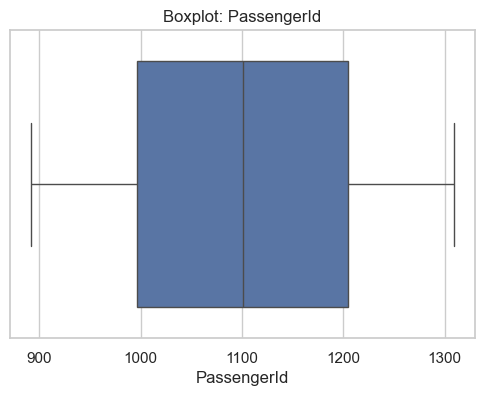

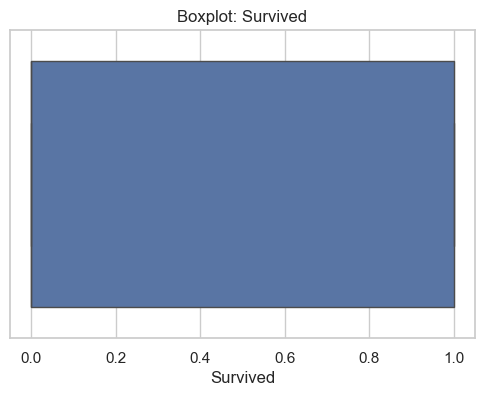

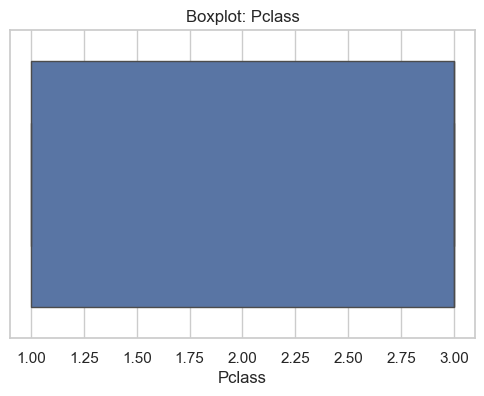

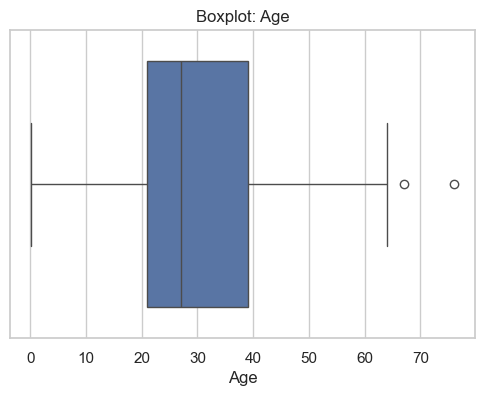

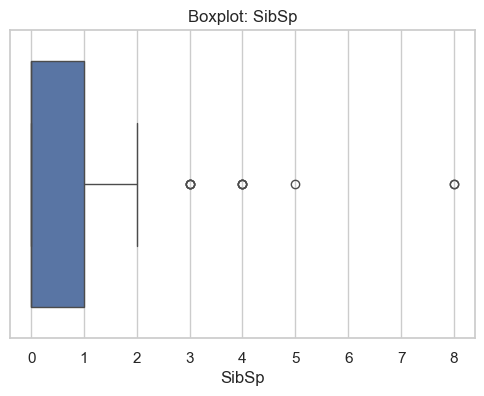

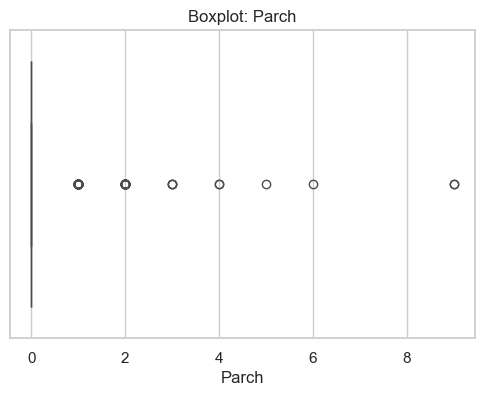

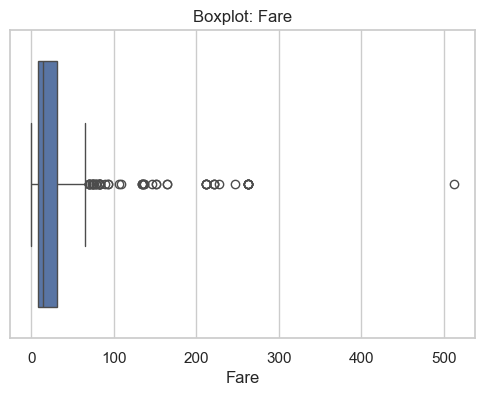

In [9]:
# Cell 8: Boxplots (overall)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


Chosen categorical for boxplots: Sex


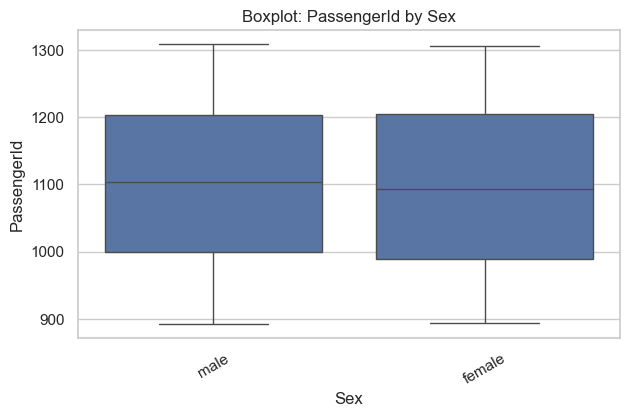

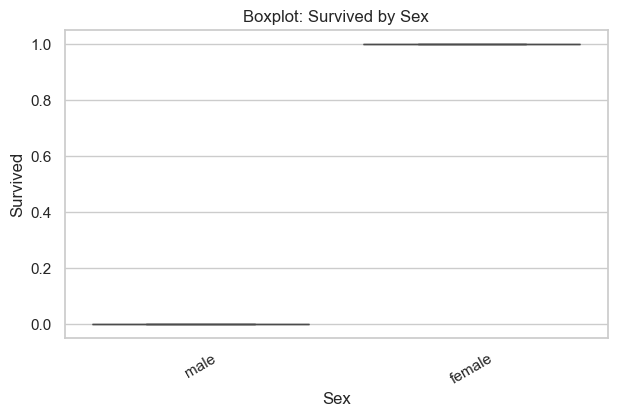

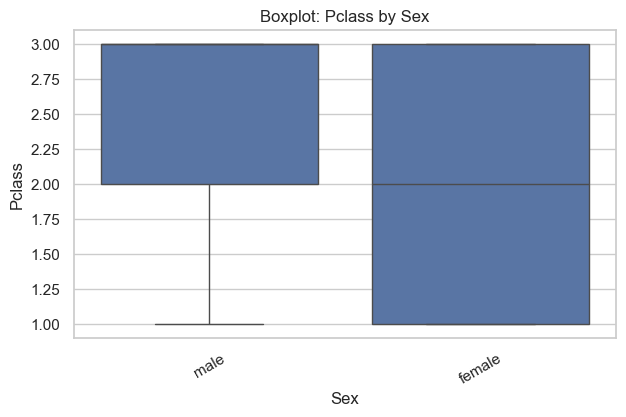

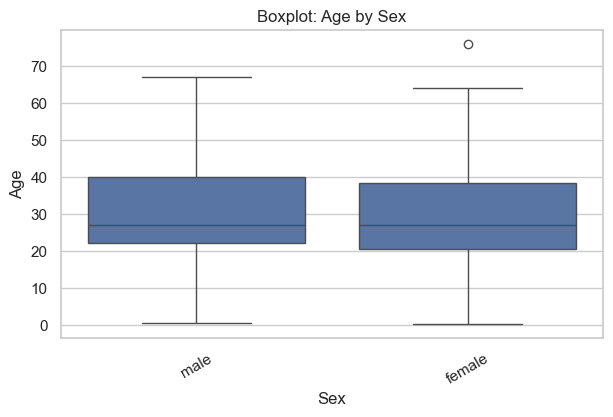

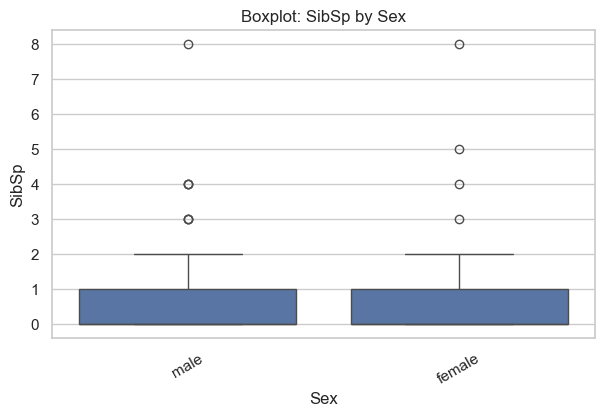

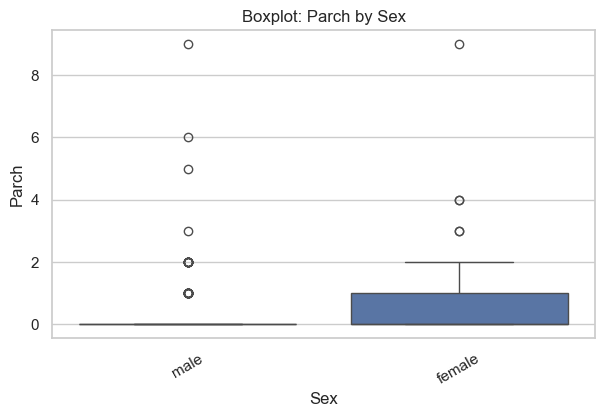

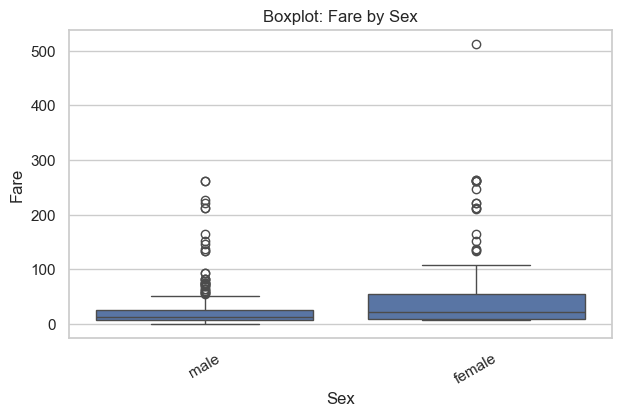

In [10]:
# Cell 9: Pick a categorical column with few unique values
few_cat_cols = [c for c in cat_cols if df[c].nunique(dropna=False) <= 10]
target_cat = few_cat_cols[0] if few_cat_cols else None
print("Chosen categorical for boxplots:", target_cat)

if target_cat:
    for col in numeric_cols:
        plt.figure(figsize=(7,4))
        sns.boxplot(data=df, x=target_cat, y=col)
        plt.title(f"Boxplot: {col} by {target_cat}")
        plt.xticks(rotation=30)
        plt.show()


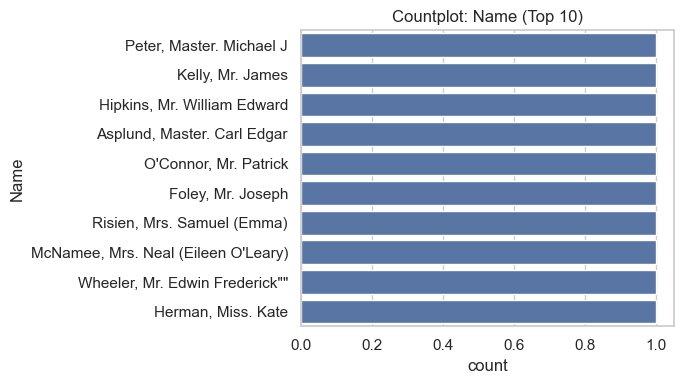

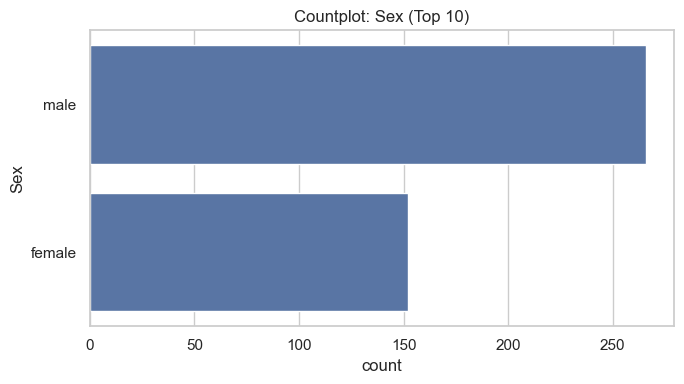

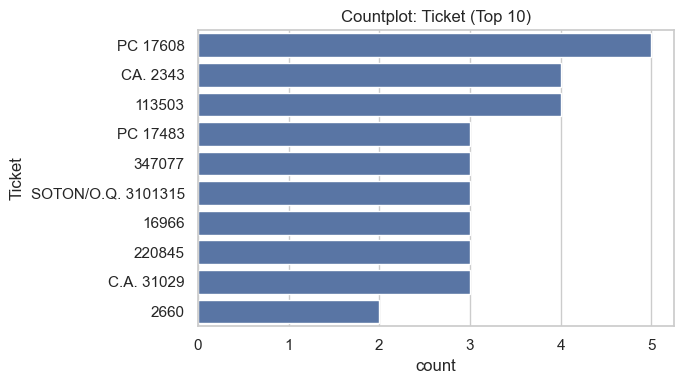

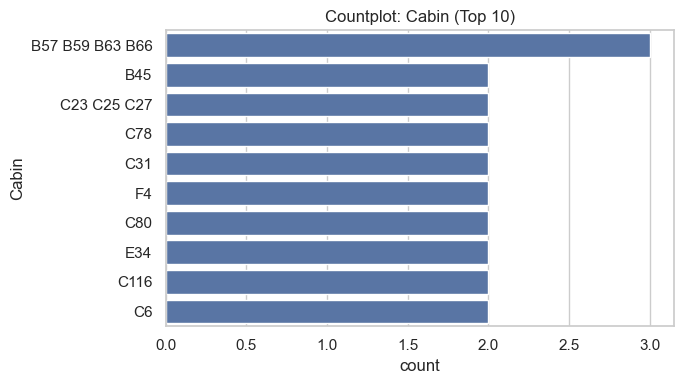

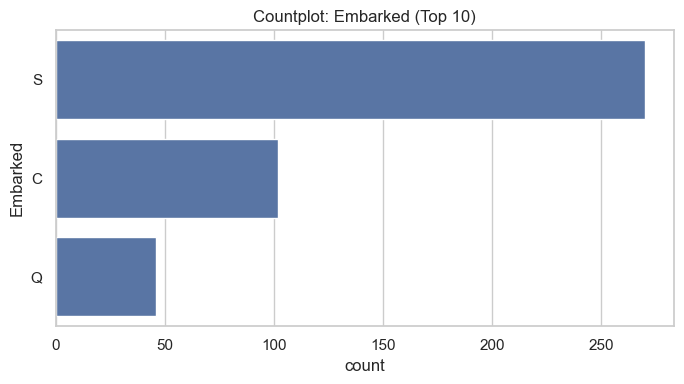

In [11]:
# Cell 10: Countplots (top 10 categories for readability)
for col in cat_cols[:10]:
    order = df[col].value_counts().index[:10]
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, y=col, order=order)
    plt.title(f"Countplot: {col} (Top 10)")
    plt.tight_layout()
    plt.show()


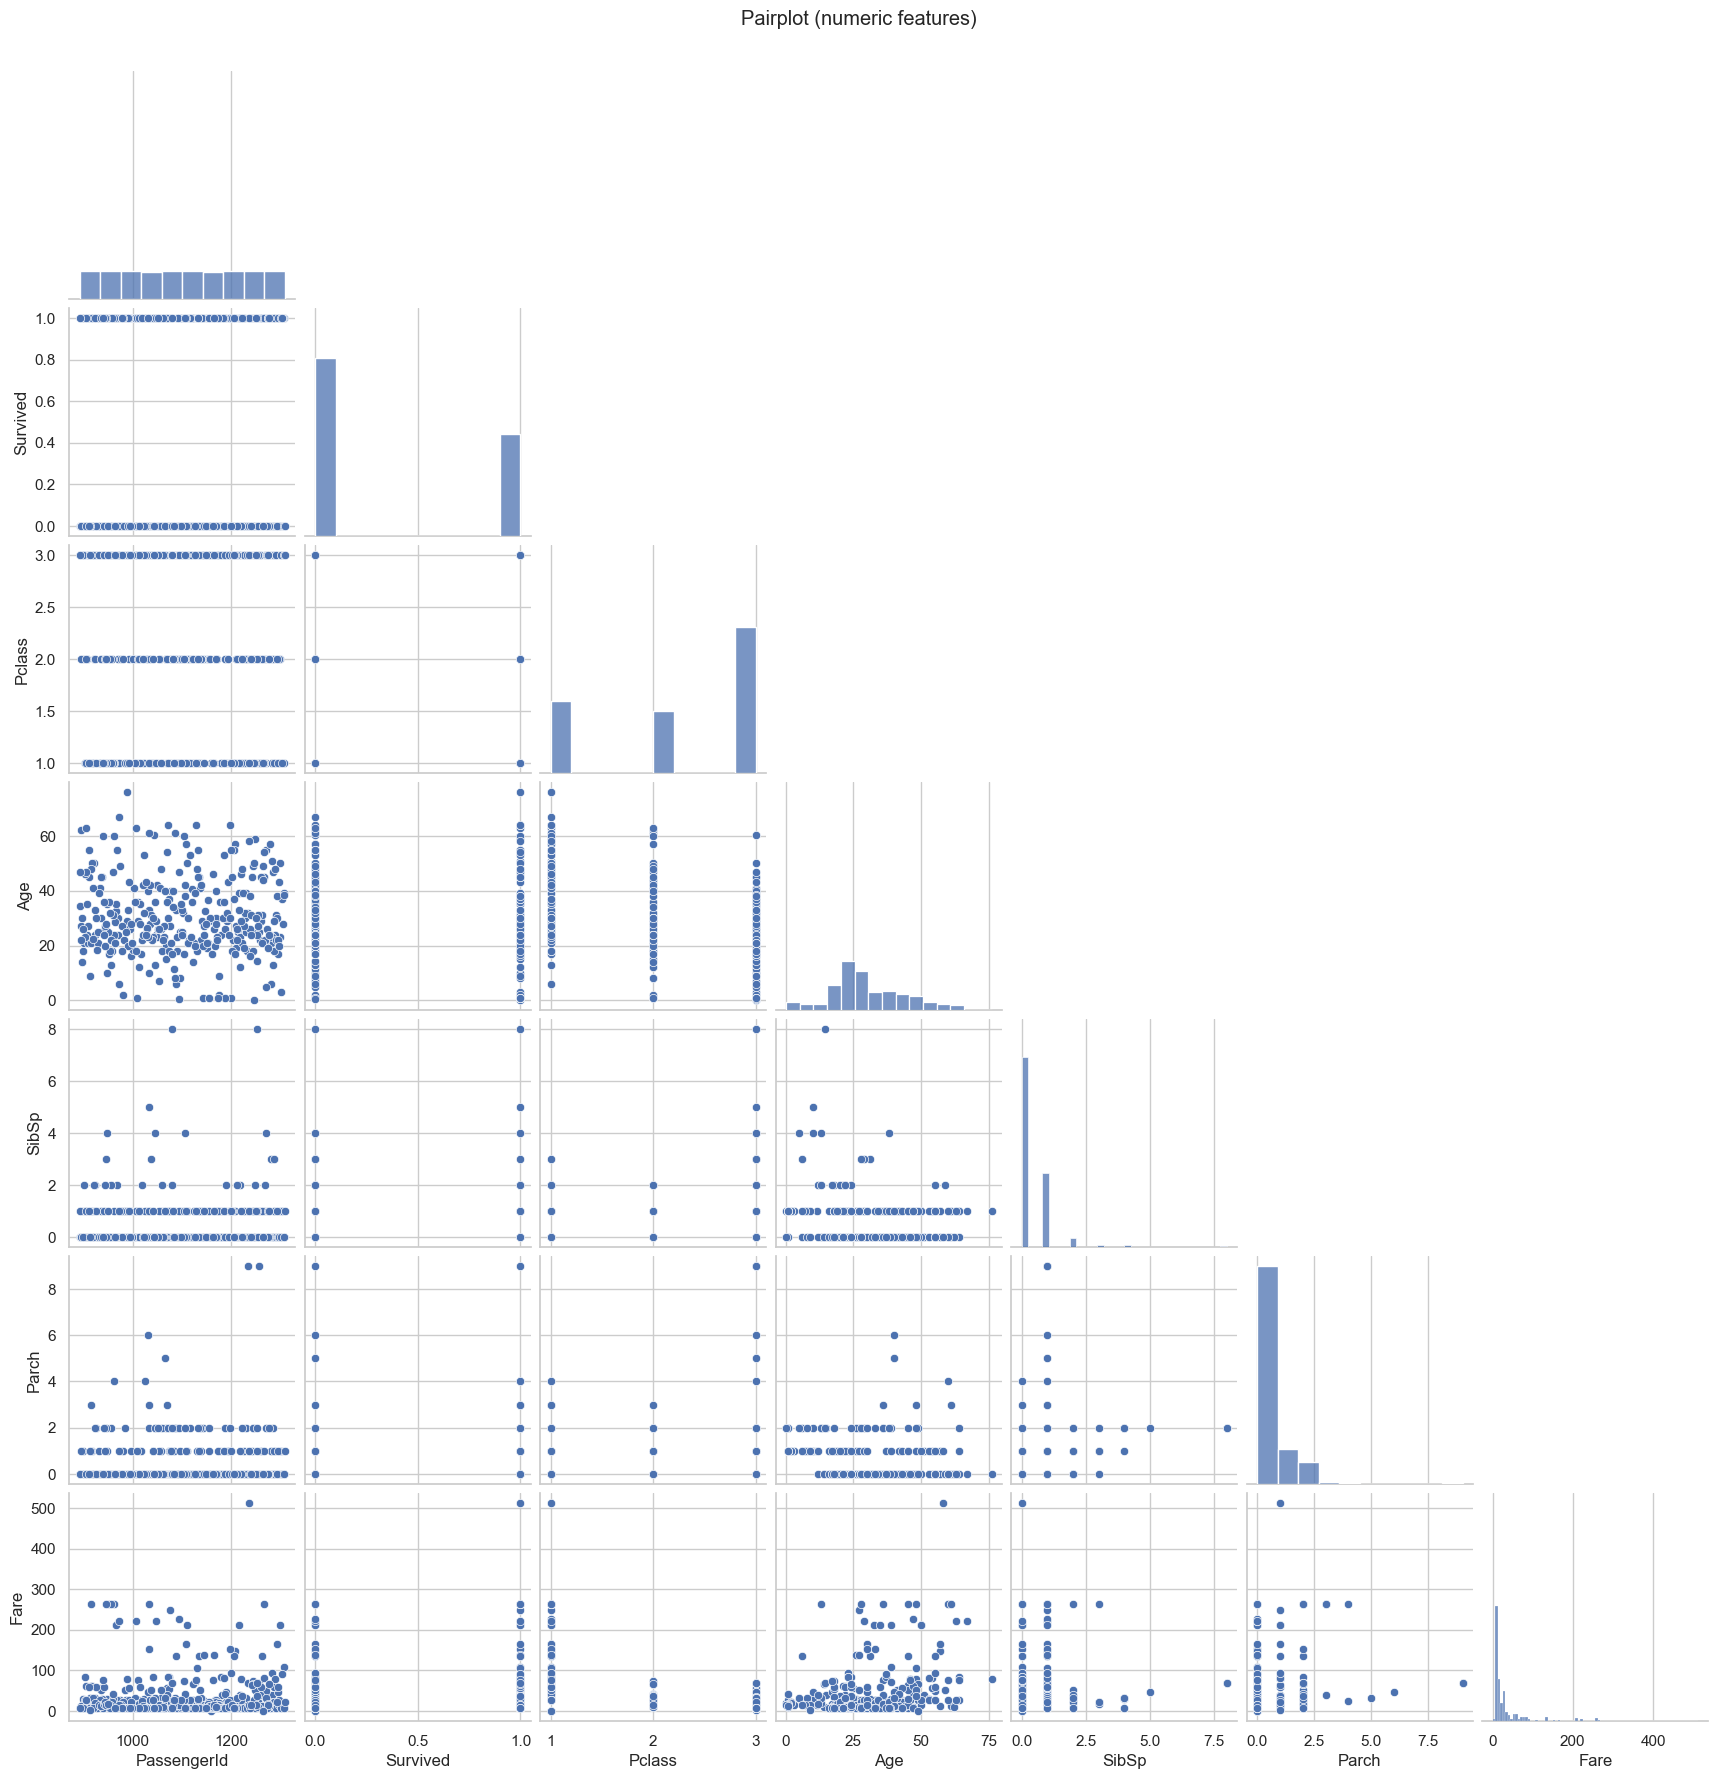

In [12]:
# Cell 11: Pairplot on numeric sample (avoid huge plots)
sampled = df[numeric_cols].sample(min(1000, len(df)), random_state=42) if numeric_cols else df
if len(numeric_cols) >= 2:
    sns.pairplot(sampled[numeric_cols], diag_kind="hist", corner=True)
    plt.suptitle("Pairplot (numeric features)", y=1.02)
    plt.show()
else:
    print("Not enough numeric columns for pairplot.")


# 5) Correlation analysis

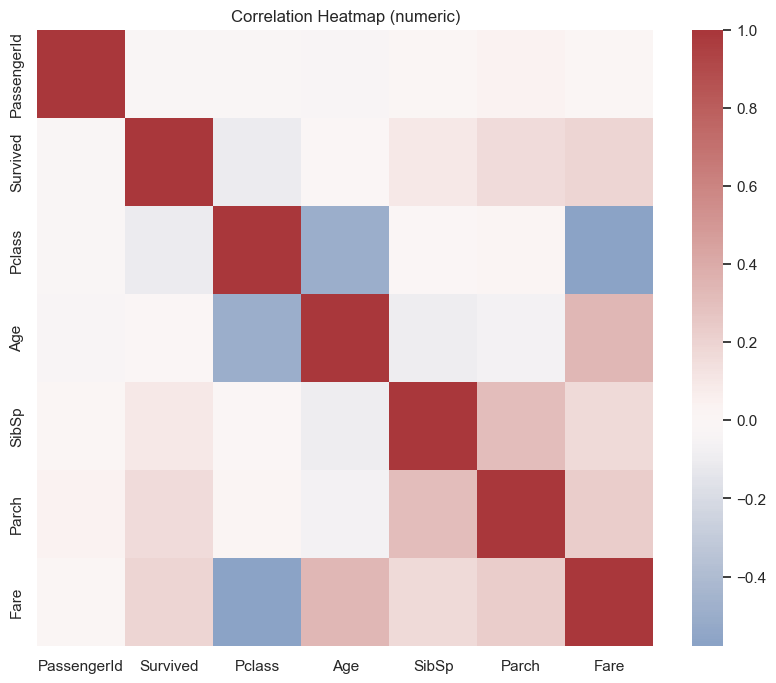

Top correlations:
 Fare    Pclass    0.577147
Pclass  Fare      0.577147
        Age       0.492143
Age     Pclass    0.492143
        Fare      0.337932
Fare    Age       0.337932
SibSp   Parch     0.306895
Parch   SibSp     0.306895
        Fare      0.230046
Fare    Parch     0.230046
dtype: float64


In [13]:
# Cell 12: Correlation heatmap (numeric only)
if numeric_cols:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=False, cmap="vlag", center=0, square=True)
    plt.title("Correlation Heatmap (numeric)")
    plt.show()

    # Top correlated pairs (absolute)
    corr_pairs = (
        corr.where(~np.eye(corr.shape[0], dtype=bool))
            .stack()
            .reindex()
            .abs()
            .sort_values(ascending=False)
    )
    print("Top correlations:\n", corr_pairs.head(10))
else:
    print("No numeric columns for correlation.")


 # 6) Grouping & aggregation (category-level patterns)

In [14]:
# Cell 13: Example groupby — mean/median of numerics by a categorical feature
if target_cat:
    agg_funcs = ["count", "mean", "median", "std", "min", "max"]
    grouped = df.groupby(target_cat)[numeric_cols].agg(agg_funcs)
    display(grouped.head(10))
else:
    print("No low-cardinality categorical column found for grouping.")


PassengerId                                             Survived       \
             count         mean  median         std  min   max    count mean   
Sex                                                                            
female         152  1096.789474  1093.5  123.345508  893  1306      152  1.0   
male           266  1102.620301  1103.5  119.520499  892  1309      266  0.0   

                           Pclass                                      Age  \
       median  std min max  count      mean median       std min max count   
Sex                                                                          
female    1.0  0.0   1   1    152  2.144737    2.0  0.887051   1   3   127   
male      0.0  0.0   0   0    266  2.334586    3.0  0.808497   1   3   205   

                                                SibSp                   \
             mean median        std   min   max count      mean median   
Sex                                                                      
female  30.272362   27.0  15.428613  0.17  76.0   152  0.565789    0.0   
male    30.272732   27.0  13.389528  0.33  67.0   266  0.379699    0.0   

                         Parch                                     Fare  \
             std min max count      mean median       std min max count   
Sex                                                                       
female  0.974313   0   8   152  0.598684    0.0  1.105434   0   9   152   
male    0.843735   0   8   266  0.274436    0.0  0.883745   0   9   265   

                                                       
             mean   median        std   min       max  
Sex                                                    
female  49.747699  21.5125  73.108716  6.95  512.3292  
male    27.527877  13.0000  41.079423  0.00  262.3750

In [15]:
# Cell 14: Skewness
if numeric_cols:
    skew_vals = df[numeric_cols].skew(numeric_only=True).sort_values(ascending=False)
    print("Skewness (higher = more skewed):")
    display(skew_vals)


Skewness (higher = more skewed):


Parch          4.654462
SibSp          4.168337
Fare           3.687213
Survived       0.568991
Age            0.457361
PassengerId    0.000000
Pclass        -0.534170
dtype: float64

In [16]:
# Cell 15: Outlier counts via IQR
outlier_summary = {}
for col in numeric_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = {"lower": lower, "upper": upper, "outliers": outliers}
pd.DataFrame(outlier_summary).T.sort_values("outliers", ascending=False)


,lower,upper,outliers
Parch,0.0000,0.0000,94.0
Fare,-27.5105,66.9063,55.0
SibSp,-1.5000,2.5000,11.0
Age,-6.0000,66.0000,2.0
Pclass,-2.0000,6.0000,0.0
PassengerId,683.5000,1517.5000,0.0
Survived,-1.5000,2.5000,0.0


In [19]:
# Cell 16: Log-transform skewed positives
highly_skewed = [c for c in numeric_cols if df[c].min() > 0 and abs(df[c].skew()) > 1]
print("Highly skewed positive features (log1p candidate):", highly_skewed)

df_log = df.copy()
for c in highly_skewed:
    df_log[c+"_log1p"] = np.log1p(df_log[c])

# Compare distributions pre/post for one example column
if highly_skewed:
    c = highly_skewed[0]
    plt.figure(figsize=(6,4))
    sns.histplot(df[c], kde=True)
    plt.title(f"Before log1p: {c}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.histplot(df_log[c+"_log1p"], kde=True)
    plt.title(f"After log1p: {c}_log1p")
    plt.show()


Highly skewed positive features (log1p candidate): []
